In [61]:
import os 
import numpy as np
from PIL import Image as pil_image

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [15]:
PATH="/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/Saline_bottle_original_size/"
folders=['sal_data_100','sal_data_80']
list_input = ['sal_data_100','sal_data_80']

def create_classes(list_input):
    classes_dict = {}
    count_dict = {}
    for i in range(len(folders)):
        key_word= folders[i]
        if key_word in list_input:
            #get the index of the list:
            index = list_input.index(key_word)
            classes_dict[key_word] = index
        else:
            count_dict[key_word] = 0
            classes_dict[key_word] = len(list_input)
    return classes_dict, count_dict
classes_dict, count_dict = create_classes(list_input)
print(classes_dict)



{'sal_data_100': 0, 'sal_data_80': 1}


In [13]:
resize_path= os.getcwd()
print(resize_path)
resize_path=os.path.join(resize_path,"resize_sal_data_temp_del/")
print(resize_path)

data_label_path = os.getcwd()
data_label_path=os.path.join(data_label_path,"data_label/")
print(data_label_path)

if not os.path.isdir(data_label_path):
    print("Creating the directory")
    os.makedirs(data_label_path)

if not os.path.isdir(resize_path):
    print("Creating the directory")
    os.makedirs(resize_path)

for label in folders:
    label_dir=os.path.join(resize_path,label)
    if not os.path.isdir(label_dir):
        os.makedirs(label_dir)

/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER
/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER/resize_sal_data_temp_del/
/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER/data_label/


In [28]:
img_dir=os.listdir(PATH)
print(img_dir)
img_dir.remove(".DS_Store") 
print(img_dir)

data_file = open("data_label/saline_data_label.txt",'w')

for dir in img_dir:
    img_path=PATH + "/" + dir
    for img in os.listdir(img_path):
        print(dir+'/'+img)
        data_file.write(dir+'/'+img+"\n")

data_file.close() 

['sal_data_100', '.DS_Store', 'sal_data_80']
['sal_data_100', 'sal_data_80']
sal_data_100/IMG20200208150700.jpg
sal_data_100/IMG20200208145457.jpg
sal_data_100/IMG20200208150037_01.jpg
sal_data_100/IMG20200208150927.jpg
sal_data_100/IMG20200208150933.jpg
sal_data_100/IMG20200208150502.jpg
sal_data_100/IMG20200208150129_01.jpg
sal_data_100/IMG20200208150258.jpg
sal_data_100/IMG20200208143556.jpg
sal_data_100/IMG20200208150705_01.jpg
sal_data_100/IMG20200208145243_01.jpg
sal_data_100/IMG20200208142714.jpg
sal_data_100/IMG20200208145709.jpg
sal_data_100/IMG20200208150304.jpg
sal_data_100/IMG20200208150125_01.jpg
sal_data_100/IMG20200208143422.jpg
sal_data_100/IMG20200208150338.jpg
sal_data_100/IMG20200208150709_01.jpg
sal_data_100/IMG20200208142927.jpg
sal_data_100/IMG20200208150648.jpg
sal_data_100/IMG20200208145245.jpg
sal_data_100/IMG20200208143146.jpg
sal_data_100/IMG20200208145400_01.jpg
sal_data_100/IMG20200208145500_01.jpg
sal_data_100/IMG20200208143150_01.jpg
sal_data_100/IMG20200

In [93]:
from PIL import Image
import PIL.ImageOps  
import cv2
res=64
# open the label/data file
f = open("data_label/saline_data_label.txt", "r")
# form list from the given file
lines = f.readlines()
X = []
Y = []
# Mention the resize image shape
size=(res,res)
resize_loc_path=resize_path
for line in lines:
  try:
    # remove the \n 
    line = line.strip('\n')
    # separate label and data
    label, file_name = line.split("/")
    # folders contains all the required labels
    if label in folders:
       file_path = PATH + label + "/" + file_name
       # open the original size image
       img=pil_image.open(file_path)

       #to use negative on images 
       inverted_img = PIL.ImageOps.invert(img)

       #to convert to YCrCb
       #imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB) # or inverted_img 

       # resize the original image to the size mentioned
       img_reshape=inverted_img.resize(size) ## choose: img, imgYCC, inverted_img
       # print(img_reshape.format, img_reshape.size, img_reshape.mode)
       # Location of the resized image as per the label
       resize_loc= resize_loc_path + label + "/" + file_name
       # checks if the resized is does not exist already 
       if file_name not in resize_loc_path + label + "/":
          img_reshape.save(resize_loc)
       # converting the image object to 
       np_im = np.array(img_reshape)
       class_number=classes_dict[label] 
       X.append(np_im)
       Y.append(class_number)
       

  except Exception as e:
           print(str(e))
    
X_ori = np.array(X)
Y_ori = np.array(Y)



AttributeError: 'list' object has no attribute 'shape'

In [95]:
np.save('X_ori.npy')
np.save('Y_ori.npy')

[[[158 228 220]
  [155 226 217]
  [147 222 210]
  ...
  [122 197 188]
  [141 216 201]
  [141 210 203]]

 [[159 228 220]
  [156 227 218]
  [146 221 208]
  ...
  [120 200 181]
  [110 185 174]
  [120 201 181]]

 [[162 229 222]
  [157 226 217]
  [148 221 209]
  ...
  [137 222 197]
  [133 218 191]
  [129 215 187]]

 ...

 [[ 75  73  76]
  [ 76  74  77]
  [ 75  73  77]
  ...
  [ 99 108 126]
  [108 119 134]
  [101 112 130]]

 [[ 78  76  79]
  [ 78  76  80]
  [ 77  75  80]
  ...
  [ 96 107 124]
  [ 99 109 126]
  [104 114 131]]

 [[ 80  78  81]
  [ 80  78  82]
  [ 78  76  82]
  ...
  [ 95 106 123]
  [100 110 127]
  [114 124 137]]]


In [97]:
with open('X_ori.npy', 'wb') as f:
    np.save(f, X_ori)
with open('Y_ori.npy', 'wb') as f:
    np.save(f, Y_ori)


In [49]:
augmented_path= os.getcwd()
print(augmented_path)
augmented_path=os.path.join(augmented_path,"resize_sal_data_augmented/")
if not os.path.isdir(augmented_path):
    print("Creating the directory")
    os.makedirs(augmented_path)
    
for label in folders:
    label_dir=os.path.join(augmented_path,label)
    if not os.path.isdir(label_dir):
        os.makedirs(label_dir)


/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER


In [54]:
print(augmented_path)
print(os.getcwd())

/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER/resize_sal_data_augmented/
/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER


In [62]:
res = 64
# open the label/data file
f = open("data_label/saline_data_label.txt", "r")
# form list from the given file
lines = f.readlines()
X = []
Y = []
# Mention the resize image shape
size=(res,res)

augmented_loc_path=augmented_path

#data generator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

for line in lines:
  try:
    # remove the \n 
    line = line.strip('\n')
    # separate label and data
    label, file_name = line.split("/")
    # folders contains all the required labels
    if label in folders:
       file_path = PATH + label + "/" + file_name
       # open the original size image
       img=pil_image.open(file_path)
       
       #to use inverted images 
       inverted_img = PIL.ImageOps.invert(img)

       #to convert to YCrCb
       #imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB) # or inverted_img 

       # resize the original image to the size mentioned
       img_reshape=inverted_img.resize(size) ## choose: img, imgYCC, inverted_img
       #print(img_reshape.format, img_reshape.size, img_reshape.mode)
       # Location of the resized image as per the label
       augmented_loc= augmented_loc_path + label + "/" + file_name
       aug_dir=augmented_loc_path + label
        
       x = img_to_array(img_reshape)  # this is a Numpy array with shape (3, 32, 32) if size = 32,32
       x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 32, 32) if size = 32,32
        
       # checks if the resized is does not exist already 
       img_reshape.save(augmented_loc)
       # the .flow() command below generates batches of randomly transformed images
       # and saves the results to the directory
       i = 0
       for batch in datagen.flow(x, batch_size=1,
                                 save_to_dir=aug_dir, save_prefix='IMG_AUG', save_format='jpg'):
           i += 1
           if i > 20:
               break  # otherwise the generator would loop indefinitely
        
        
       # converting the image object to 
       np_im = np.array(img_reshape)
       class_number=classes_dict[label] 
       X.append(np_im)
       Y.append(class_number)
       

  except Exception as e:
           print(str(e))
    
X = np.array(X)
Y = np.array(Y)
print(Y.shape)

(2111,)


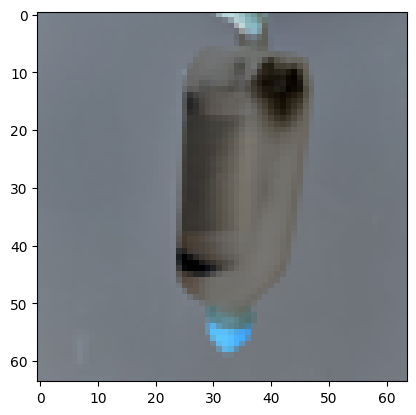

1
